In [0]:
pip install torch

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn 
import torch 
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 10) 

    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)

        return out

In [0]:
neuron=CNN()
print(neuron)

CNN(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)


In [0]:
criterion=nn.CrossEntropyLoss()
print(type(criterion))

<class 'torch.nn.modules.loss.CrossEntropyLoss'>


In [0]:
import torch.optim as optim
optimizer=optim.SGD(neuron.parameters(),1e-3)

In [0]:
print(neuron.parameters())
print(len(list(neuron.parameters())))
print(list(neuron.parameters())[0].size())
print(list(neuron.parameters())[1].size())
print(list(neuron.parameters())[2].size())
print(list(neuron.parameters())[3].size())
print(list(neuron.parameters())[4].size())
print(list(neuron.parameters())[5].size())

<generator object Module.parameters at 0x7f710ada9e60>
6
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


In [0]:
"""import torchvision
train = dsets.MNIST(root='data/',
                          train=True,
                          transform=torchvision.transforms.ToTensor(),
                          download=True)
test = dsets.MNIST(root='data/',
                         train=False,
                         transform=torchvision.transforms.ToTensor(),
                         download=True)

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)
print(train,train.data,train.data.size())
print(test,test.data,test.data.size())
print(trainset,testset)"""

"import torchvision\ntrain = dsets.MNIST(root='data/',\n                          train=True,\n                          transform=torchvision.transforms.ToTensor(),\n                          download=True)\ntest = dsets.MNIST(root='data/',\n                         train=False,\n                         transform=torchvision.transforms.ToTensor(),\n                         download=True)\n\ntrainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)\ntestset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)\nprint(train,train.data,train.data.size())\nprint(test,test.data,test.data.size())\nprint(trainset,testset)"

In [0]:
train=torch.from_numpy(np.random.random((60000,28,28)))
print(train.shape)
test=torch.from_numpy(np.random.random((10000,28,28)))
print(test.shape)
train_labels=torch.from_numpy(np.random.randint(10,size=60000))
print(train_labels.shape)
test_labels=torch.from_numpy(np.random.randint(10,size=10000))
print(test_labels.shape,test_labels)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000]) tensor([7, 3, 0,  ..., 3, 4, 0])


In [0]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

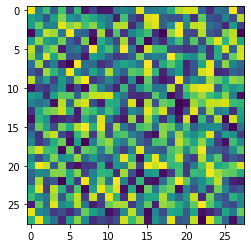

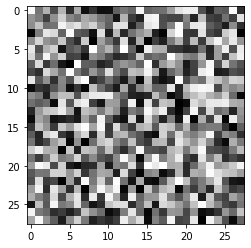

In [0]:
plt.imshow(train[4])
plt.show()
idx = 4
plt.imshow(train[idx,:,:].numpy(), cmap='gray')

In [0]:
print(train.shape)
train1=train.unsqueeze(1)
print(train1.shape)

torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


In [0]:
class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    data=data.unsqueeze(0)
    return (data,self.label[index])

In [0]:
train_data=PrepData(train,train_labels)
test_data=PrepData(test,test_labels)

In [0]:
print(train_data[1][1])

tensor(6)


In [0]:
print(train_data[1][0])

tensor([[[7.2533e-01, 5.2369e-01, 4.4379e-01, 5.6202e-01, 6.0454e-01,
          2.8838e-02, 7.8923e-01, 4.0149e-01, 6.7134e-01, 9.0011e-01,
          9.3584e-02, 3.4544e-01, 5.3081e-02, 7.4006e-01, 5.9649e-01,
          6.9501e-01, 4.6942e-01, 2.9323e-02, 1.0793e-01, 2.3576e-01,
          7.8584e-03, 4.1875e-01, 7.5064e-01, 2.3013e-01, 5.9040e-01,
          7.4532e-01, 9.7333e-02, 6.2517e-01],
         [7.9464e-01, 1.7911e-01, 2.5886e-01, 1.9707e-01, 2.9106e-02,
          6.2426e-02, 2.0525e-01, 6.2574e-01, 1.2652e-01, 4.7981e-01,
          6.4015e-01, 8.4258e-01, 8.3053e-01, 8.7049e-01, 6.6059e-01,
          1.7616e-01, 9.8842e-01, 6.8083e-02, 6.7161e-01, 9.6047e-01,
          9.6942e-01, 7.2151e-01, 3.6955e-01, 8.0127e-01, 6.8878e-01,
          5.6041e-01, 2.6489e-01, 5.3368e-01],
         [5.0366e-01, 7.2384e-01, 5.5725e-01, 3.7884e-01, 8.7921e-01,
          6.6350e-01, 1.6996e-01, 9.8428e-02, 8.6138e-01, 9.6011e-01,
          1.7150e-01, 7.5654e-01, 4.2474e-01, 5.3643e-01, 9.1444e-

In [0]:
train_loader = DataLoader(dataset=train_data,batch_size=50,shuffle=True)
test_loader=DataLoader(dataset=test_data,batch_size=50,shuffle=False)

In [0]:
a,b=next(iter(test_loader))

In [0]:
a.shape

torch.Size([50, 1, 28, 28])

In [0]:
b.shape

torch.Size([50])

In [0]:
from tqdm import tqdm
iter = 0
for epoch in tqdm(range(2)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_()
        optimizer.zero_grad()

        # images = images.double()
        images = images.type(torch.DoubleTensor)

        outputs = neuron(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1

    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.requires_grad_()
        outputs = neuron(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
    print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

  0%|          | 0/2 [00:00<?, ?it/s]


RuntimeError: ignored